<a href="https://colab.research.google.com/github/ethngo7/pytorchfire/blob/main/calibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Install pytorchfire and dependencies

%pip install pytorchfire
%pip install requests
%pip install matplotlib
%pip install tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
# @title Download the dataset

from google.colab import files
import requests

# @markdown If you want to upload your own data, set `upload_custom_data` to `True` and make sure to upload all the files listed in `file_list`.
# @markdown The format should be either `.npy` or `.npz`.
# @markdown If you want to use the demo dataset, set `upload_custom_data` to `False`.
upload_custom_data = False # @param {type:"boolean"}

file_list = [
    'initial_ignition',
    'p_den',
    'p_veg',
    'slope',
    'target',
    'wind_towards_direction',
    'wind_velocity',
    'target',
]

def download_file(url, filename):
    response = requests.get(url, stream=True)
    response.raise_for_status()

    with open(filename, 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192):
            file.write(chunk)

if upload_custom_data:
    uploaded = files.upload()

    for fn in uploaded.keys():
      print('User uploaded file "{name}" with length {length} bytes'.format(
          name=fn, length=len(uploaded[fn])))
else:
    remote_map_name = 'Bear_2020'

    for file in file_list:
        file_url = f'https://github.com/xiazeyu/PyTorchFire/raw/refs/heads/main/examples/{remote_map_name}/{file}.npz'
        filename = f'{file}.npz'
        download_file(file_url, filename)

        print(f"File downloaded and saved as {filename}")


File downloaded and saved as initial_ignition.npz
File downloaded and saved as p_den.npz
File downloaded and saved as p_veg.npz
File downloaded and saved as slope.npz
File downloaded and saved as target.npz
File downloaded and saved as wind_towards_direction.npz
File downloaded and saved as wind_velocity.npz
File downloaded and saved as target.npz


In [4]:
# @title Load the dataset
import numpy as np
import os

def load_np_file(file_name):

    if os.path.exists(f'{file_name}.npy'):
        return np.load(f'{file_name}.npy')
    elif os.path.exists(f'{file_name}.npz'):
        ds = np.load(f'{file_name}.npz')
        if len(ds.files) == 1:
            return ds[ds.files[0]]
        else:
            raise ValueError(f"Multiple arrays found in {file_name}. Please provide a single array.")

p_veg = load_np_file('p_veg')
p_den = load_np_file('p_den')
wind_towards_direction = load_np_file('wind_towards_direction')
wind_velocity = load_np_file('wind_velocity')
slope = load_np_file('slope')
initial_ignition = load_np_file('initial_ignition')
target = load_np_file('target')

a = 0.13324953615665436 # @param {type:"number"}
c_1 = 0.11270108073949814 # @param {type:"number"}
c_2 = 0.15624772012233734 # @param {type:"number"}
max_steps = 50 # @param {type:"integer"}
p_continue = 0.2814338207244873 # @param {type:"slider", min:0, max:1, step:0.05}
p_h = 0.3236876130104065 # @param {type:"slider", min:0, max:1, step:0.05}
wind_step_interval = 15 # @param {type:"integer"}


In [5]:
# Copy ignition map and modify it
custom_ignition = np.zeros_like(initial_ignition)

# Set a square region (e.g., 10x10 center area) to 1
H, W = custom_ignition.shape
center_h, center_w = H // 2, W // 2
radius = 5  # 5 in each direction = 10x10 total

custom_ignition[center_h - radius:center_h + radius,
                center_w - radius:center_w + radius] = 1

# Replace the ignition in your model
initial_ignition = custom_ignition


In [6]:

# Replace the ignition in your model
initial_ignition = custom_ignition

In [7]:
# @title Define Trainer class (similar to DataLoader)

from pytorchfire import WildfireModel, BaseTrainer
from tqdm import tqdm
import torch

class DemoTrainer(BaseTrainer):
    def train(self):

        self.reset()
        self.model.to(self.device)
        self.model.train()

        max_iterations = self.max_steps // self.steps_update_interval

        postfix = {}
        with tqdm() as progress_bar:
            for epochs in range(self.max_epochs):
                postfix['epoch'] = f'{epochs + 1}/{self.max_epochs}'
                self.model.reset()
                batch_seed = self.model.seed

                for iterations in range(max_iterations):
                    postfix['iteration'] = f'{iterations + 1}/{max_iterations}'
                    iter_max_steps = min(self.max_steps, (iterations + 1) * self.steps_update_interval)
                    progress_bar.reset(total=iter_max_steps)

                    for steps in range(iter_max_steps):
                        postfix['step'] = f'{steps + 1}/{iter_max_steps}'

                        if steps % wind_step_interval == 0:
                            self.model.wind_towards_direction = torch.tensor(
                                wind_towards_direction[steps // wind_step_interval], device=self.device)
                            self.model.wind_velocity = torch.tensor(wind_velocity[steps // wind_step_interval],
                                                                    device=self.device)

                        self.model.compute(attach=self.check_if_attach(steps, iter_max_steps))

                        progress_bar.set_postfix(postfix)
                        progress_bar.update(1)

                    outputs = self.model.accumulator
                    targets = target[iter_max_steps - 1]
                    targets = torch.tensor(targets, device=self.device)

                    loss = self.criterion(outputs, targets)
                    postfix['loss'] = f'{loss.item():.4f}'

                    self.backward(loss)
                    self.model.reset(seed=batch_seed)

    def evaluate(self):

        self.reset()
        self.model.to(self.device)
        self.model.eval()

        affected_cell_count_outputs = []
        affected_cell_count_targets = []

        postfix = {}
        output_list = []

        with tqdm(total=self.max_steps) as progress_bar:
                with torch.no_grad():
                    for steps in range(self.max_steps):
                        postfix['steps'] = f'{steps + 1}/{self.max_steps}'

                        if steps % wind_step_interval == 0:
                            self.model.wind_towards_direction = torch.tensor(
                                wind_towards_direction[steps // wind_step_interval], device=device)
                            self.model.wind_velocity = torch.tensor(wind_velocity[steps // wind_step_interval],
                                                                    device=device)

                        self.model.compute()
                        outputs = self.model.state[0] | self.model.state[1]

                        postfix['burning'] = self.model.state[0].sum().detach().cpu().item()
                        postfix['burned'] = self.model.state[1].sum().detach().cpu().item()

                        output_list.append(outputs.cpu().detach().numpy())

                        progress_bar.set_postfix(postfix)
                        progress_bar.update(1)

        return output_list

In [8]:
# @title Define trainer

from pytorchfire import WildfireModel, BaseTrainer
from tqdm import tqdm
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(f"Using device: {device}")

trainer = DemoTrainer(model=WildfireModel({
            'p_veg': torch.tensor(p_veg),
            'p_den': torch.tensor(p_den),
            'wind_towards_direction': torch.tensor(wind_towards_direction[0]),
            'wind_velocity': torch.tensor(wind_velocity[0]),
            'slope': torch.tensor(slope),
            'initial_ignition': torch.tensor(initial_ignition, dtype=torch.bool)
        }, {
            'a': torch.tensor(.0),
            'p_h': torch.tensor(.15),
            'p_continue': torch.tensor(.3),
            'c_1': torch.tensor(.0),
            'c_2': torch.tensor(.0),
        }), device=torch.device(device))

trainer.max_epochs = 5
trainer.steps_update_interval = 10
trainer.max_steps = max_steps
trainer.lr = 0.005
trainer.seed = None


Using device: cpu


100%|██████████| 50/50 [00:15<00:00,  3.14it/s, steps=50/50, burning=65, burned=1905]


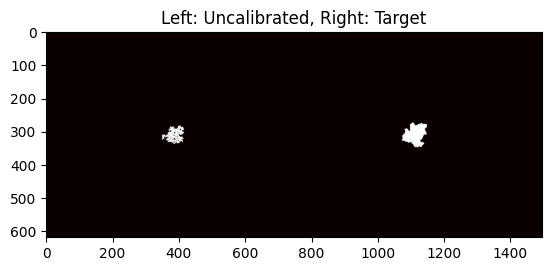

In [9]:
# @title Visualize the simulation (before calibration)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# generate uncalibrated simulation
after_calibration = np.array(trainer.evaluate())
ground_truth = target[:max_steps]

combined = np.concatenate((np.array(after_calibration), ground_truth), axis=2)

fig, ax = plt.subplots()

im = ax.imshow(combined[0], cmap='hot')
ax.set_title('Left: Uncalibrated, Right: Target')

def update(frame):
    im.set_array(combined[frame])
    return [im]

ani = FuncAnimation(
    fig, update, frames=len(combined), interval=100, blit=True
)

ani.save('calibration_before.gif', fps=10)
HTML(ani.to_jshtml())

![Animation](https://github.com/xiazeyu/PyTorchFire/blob/main/examples/calibration_before.gif?raw=1)

In [11]:
# @title Evaluation Metrics (before Calibration)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score

# BEFORE CALIBRATION
gt = (ground_truth > 0.5).astype(int).reshape(-1)
pred_before = (after_calibration > 0.5).astype(int).reshape(-1)

# ⬇️ Store in separate variables
accuracy_b = accuracy_score(gt, pred_before)
precision_b = precision_score(gt, pred_before, zero_division=0)
recall_b = recall_score(gt, pred_before, zero_division=0)
f1_b = f1_score(gt, pred_before, zero_division=0)
iou_b = jaccard_score(gt, pred_before, zero_division=0)
temp_err_b = np.mean(np.abs(np.argmax(after_calibration, axis=0) - np.argmax(ground_truth, axis=0)))

metrics_before_vals = {
    "Accuracy": accuracy_b,
    "Precision": precision_b,
    "Recall": recall_b,
    "F1 Score": f1_b,
    "IoU": iou_b,
    "Temporal Error": temp_err_b
}

metrics_before_vals

{'Accuracy': 0.997535398650575,
 'Precision': 0.6637862970436004,
 'Recall': 0.42040198352617614,
 'F1 Score': 0.5147760419767156,
 'IoU': np.float64(0.34659826162637564),
 'Temporal Error': np.float64(0.26655248676060234)}

In [12]:
# @title Perform parameter calibration
trainer.train()

100%|██████████| 50/50 [00:22<00:00,  2.19it/s, epoch=5/5, iteration=5/5, step=50/50, loss=0.7995]


100%|██████████| 50/50 [00:13<00:00,  3.58it/s, steps=50/50, burning=229, burned=4953]


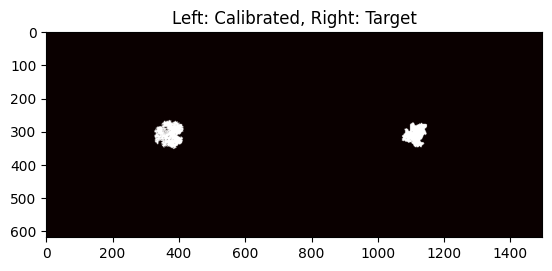

In [13]:
# @title Visualize the simulation (after calibration)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# generate calibrated simulation
after_calibration = np.array(trainer.evaluate())
ground_truth = target[:max_steps]

combined = np.concatenate((np.array(after_calibration), ground_truth), axis=2)

fig, ax = plt.subplots()

im = ax.imshow(combined[0], cmap='hot')
ax.set_title('Left: Calibrated, Right: Target')

def update(frame):
    im.set_array(combined[frame])
    return [im]

ani = FuncAnimation(
    fig, update, frames=len(combined), interval=100, blit=True
)

ani.save('calibration_after.gif', fps=10)
HTML(ani.to_jshtml())

![Animation](https://github.com/xiazeyu/PyTorchFire/blob/main/examples/calibration_after.gif?raw=1)

In [14]:
# @title Evaluation Metrics (after Calibration)


pred_after = (after_calibration > 0.5).astype(int).reshape(-1)

accuracy_a = accuracy_score(gt, pred_after)
precision_a = precision_score(gt, pred_after, zero_division=0)
recall_a = recall_score(gt, pred_after, zero_division=0)
f1_a = f1_score(gt, pred_after, zero_division=0)
iou_a = jaccard_score(gt, pred_after, zero_division=0)
temp_err_a = np.mean(np.abs(np.argmax(after_calibration, axis=0) - np.argmax(ground_truth, axis=0)))

metrics_after_vals = {
    "Accuracy": accuracy_a,
    "Precision": precision_a,
    "Recall": recall_a,
    "F1 Score": f1_a,
    "IoU": iou_a,
    "Temporal Error": temp_err_a
}
metrics_after_vals

{'Accuracy': 0.9981699394400145,
 'Precision': 0.6426741408537525,
 'Recall': 0.9268262192157571,
 'F1 Score': 0.7590278528242433,
 'IoU': np.float64(0.6116397169361639),
 'Temporal Error': np.float64(0.22683429371161007)}

/tmp/ipython-input-15-4042920635.py:38: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


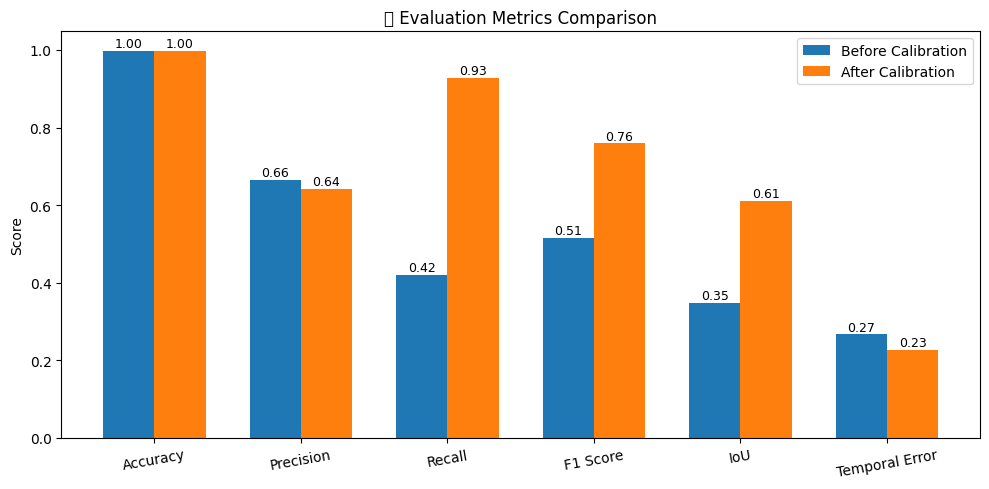

In [15]:

labels = list(metrics_before_vals.keys())
before_vals = [metrics_before_vals[k] for k in labels]
after_vals = [metrics_after_vals[k] for k in labels]

# Plotting code remains the same



import numpy as np
import matplotlib.pyplot as plt

labels = list(metrics_after_vals.keys())  # ['Accuracy', 'Precision', ...]
before_vals = [metrics_before_vals[k] for k in labels]
after_vals = [metrics_after_vals[k] for k in labels]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - width/2, before_vals, width, label='Before Calibration')
bars2 = ax.bar(x + width/2, after_vals, width, label='After Calibration')

ax.set_ylabel('Score')
ax.set_title('📊 Evaluation Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=10)
ax.legend()

# Bar labels: handle formatting for Temporal Error separately
for bar, val in zip(bars1, before_vals):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
            f"{val:.2f}" if val <= 1 else f"{val:.0f}", ha='center', fontsize=9)

for bar, val in zip(bars2, after_vals):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
            f"{val:.2f}" if val <= 1 else f"{val:.0f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


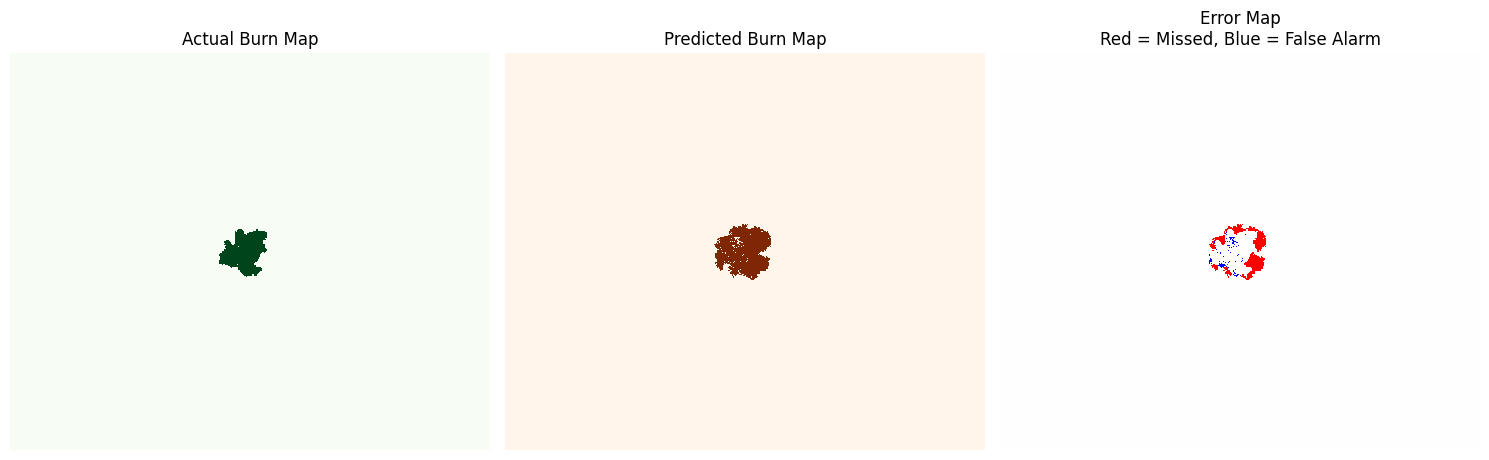

In [16]:
# @title Actual vs. Predicted vs. Error

import numpy as np
import matplotlib.pyplot as plt

# 🔄 Convert time series data into binary "burned at any time" maps
gt_burned = (ground_truth.sum(axis=0) > 0).astype(int)
pred_burned = (after_calibration.sum(axis=0) > 0).astype(int)

# 🔍 Error map: red = model missed fire (FN), blue = model false alarm (FP)
#   0 = correct, 1 = FP, -1 = FN
error_map = pred_burned - gt_burned

# 🎨 Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(gt_burned, cmap='Greens', interpolation='nearest')
axs[0].set_title("Actual Burn Map")
axs[0].axis("off")

axs[1].imshow(pred_burned, cmap='Oranges', interpolation='nearest')
axs[1].set_title("Predicted Burn Map")
axs[1].axis("off")

axs[2].imshow(error_map, cmap='bwr', interpolation='nearest', vmin=-1, vmax=1)
axs[2].set_title("Error Map\nRed = Missed, Blue = False Alarm")
axs[2].axis("off")

plt.tight_layout()
plt.show()


/tmp/ipython-input-17-920363256.py:35: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.88])  # Leave space for title
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


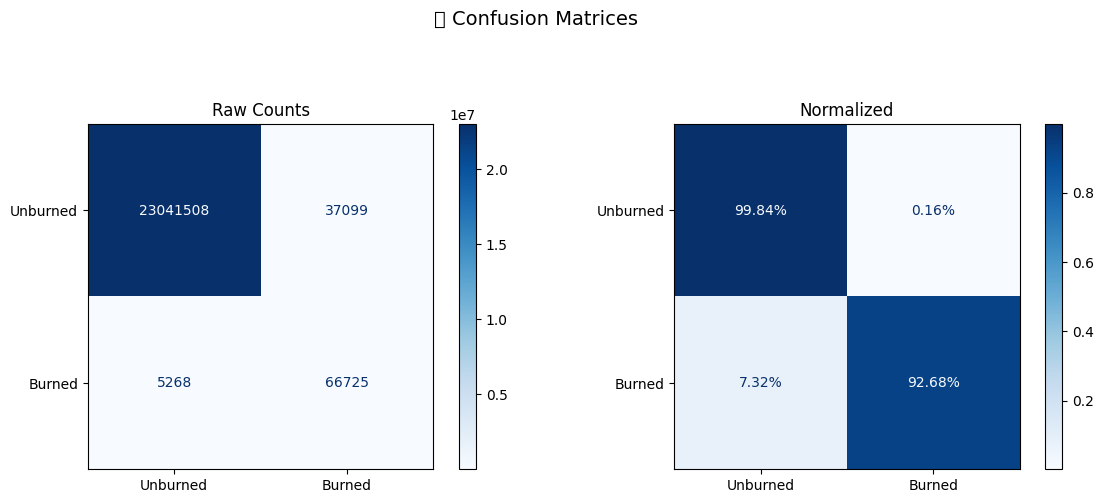

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    precision_score, recall_score
)

# Flatten the predictions and targets
target_bin = (ground_truth > 0.5).astype(int).reshape(-1)
pred_bin = (after_calibration > 0.5).astype(int).reshape(-1)



# Confusion matrices
cm_raw = confusion_matrix(target_bin, pred_bin)
cm_norm = confusion_matrix(target_bin, pred_bin, normalize='true')

# Plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Slightly smaller
fig.suptitle(f"🔥 Confusion Matrices", fontsize=14)

disp_raw = ConfusionMatrixDisplay(confusion_matrix=cm_raw, display_labels=["Unburned", "Burned"])
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=["Unburned", "Burned"])

disp_raw.plot(ax=axes[0], cmap="Blues", values_format="d", colorbar=True)
axes[0].set_title("Raw Counts")
axes[0].set_xlabel("")
axes[0].set_ylabel("")

disp_norm.plot(ax=axes[1], cmap="Blues", values_format=".2%", colorbar=True)
axes[1].set_title("Normalized")
axes[1].set_xlabel("")
axes[1].set_ylabel("")

plt.tight_layout(rect=[0, 0.03, 1, 0.88])  # Leave space for title
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


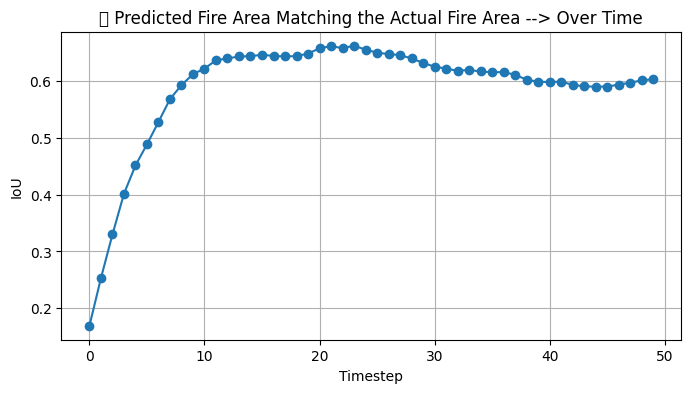

In [18]:
from sklearn.metrics import jaccard_score

timesteps = after_calibration.shape[0]
iou_per_timestep = []

for t in range(timesteps):
    pred_bin = (after_calibration[t] > 0.5).astype(int).reshape(-1)
    gt_bin = (ground_truth[t] > 0.5).astype(int).reshape(-1)
    iou = jaccard_score(gt_bin, pred_bin, zero_division=0)
    iou_per_timestep.append(iou)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(range(timesteps), iou_per_timestep, marker='o')
plt.title("📈 Predicted Fire Area Matching the Actual Fire Area --> Over Time")
plt.xlabel("Timestep")
plt.ylabel("IoU")
plt.grid(True)
plt.show()
